# Part 3 - Analyse

In [77]:
import pandas as pd

In [216]:
import matplotlib as mpl

In [219]:
from matplotlib import pyplot

In [270]:
class Analyzer:
    '''
    Class representing analyzed data attained from previous parts with attributes and methods used for analysis.
    '''
    def __init__(self, allowLog = True):
        '''
        Initilization of Downloader object. Storing objects from the webpage with self.qwe, self.rty and self.uio
        '''
        self.allowLog = allowLog
        if self.allowLog:
            print('Analyzer initialized.')    
    
    def dataLoader(self, df, whatData = 'GeoTopArtists'):
        '''
        Loads the processed data from previous parts.
        '''
        self.df = df        
        if whatData == 'GeoTopArtists':
            print('Data loaded.')
        elif whatData == 'GeoTopTracks':
            self.whatData = 'GeoTopTracks'
            print('Data loaded.')
        elif whatData == 'ArtistInfo':
            self.whatData = 'ArtistInfo'
            print('Data loaded.')
        else:
            print('I cannot recognize the type of data you want to pass. Select please from one of the following: \n\"GeoTopArtists\" \n\"GeoTopTracks\" \n\"ArtistInfo\" \nThank you very much!')
                 
    
    def showMeTheTopArtists(self, N, sortBy  = 'Scrobbles'):
        '''
        Shows the most N scrobbled artist, or the artist with the highest number of listeners.
        '''
        self.df['Scrobbles per Listener'] = self.df['Scrobbles'] / self.df['Listeners']
        
        if sortBy == 'Listeners':
            return self.df.sort_values(by = ['Listeners'], ascending = False)[['Artist', 'Listeners', 'Scrobbles', 'Scrobbles per Listener']].head(N)
        elif sortBy == 'Scrobbles':
            return self.df.sort_values(by = ['Scrobbles'], ascending = False)[['Artist', 'Listeners', 'Scrobbles', 'Scrobbles per Listener']].head(N)
        elif sortBy=='SpL':                
            return self.df.sort_values(by = ['Scrobbles per Listener'], ascending = False)[['Artist', 'Listeners', 'Scrobbles', 'Scrobbles per Listener']].head(N)
        else:
            return print('Unfortunately couldn\'t sorted the dataframe as you wish. Please choose one of the following:\n"Scrobbles"\n"Listeners"\n"SpL"\nThank you!')
    
    def plotIt(self, whatToPlot, byWhat = 'Scrobbles'):
        '''
        Creates the basic Bar plot of listeners for a given set.
        '''
        if byWhat == 'SpL':
            byWhat = 'Scrobbles per Listener'
        plot1 = whatToPlot.sort_values(by = byWhat)
        return pyplot.barh(plot1['Artist'], width = plot1[byWhat], align = 'center')
        
    def showMeCountrySpecifics(self, cntry, typ = 'Artist'):
        '''
        Shows the specific values (Artist or Tracks) which appear in Top 100 only in one country.
        '''
        cA = self.df[self.df['Country'] == cntry ][typ]
        nonCA = self.df[self.df['Country'] != cntry ][typ]
        for a in list(cA):
            if a in list(nonCA):
                pass
            else:
                print(a)
        

In [271]:
df = pd.read_csv('artist_info.csv', sep = ',')
df = df.drop(columns = ['Unnamed: 0'], axis = 1)
df.head()

,ArtistId,Artist,Listeners,Scrobbles,Tag1,Tag2,Tag3,Tag4,Tag5
0,603ba565-3967-4be1-931e-9cb945394e86,*NSYNC,1000244,13392103,pop,boybands,90s,dance,seen live
1,f37c537b-3557-4031-bfd6-ab63ced32854,10cc,757032,6539113,classic rock,rock,70s,pop,british
2,dff0d392-4cd5-4052-9fbb-f485df3891e5,2 Chainz,689853,10755122,Hip-Hop,rap,Dirty South,trap,southern rap
3,02628cd8-ca14-4545-a0b4-96020b54692b,20syl,77619,892733,Hip-Hop,french,electronic,turntablism,hip hop
4,382f1005-e9ab-4684-afd4-0bdae4ee37f2,2Pac,2245429,58602220,rap,Hip-Hop,Gangsta Rap,West Coast Rap,hip hop


In [272]:
newA = Analyzer()
newA.dataLoader(df,'ArtistInfo')

Analyzer initialized.
Data loaded.


## Some of the basic statistics and interesting results

In previous parts we processed the data of approximately 1200 most listened artists on the platform. We are going to use them for some basic analysis.

We firstly introduce the chart of the top 20 artist based on the scrobbles (i.e. number of played songs from the artists by users of Last.fm).

In [273]:
newA.showMeTheTopArtists(20)

,Artist,Listeners,Scrobbles,Scrobbles per Listener
992,The Beatles,3783733,537207098,141.978067
844,Radiohead,4821534,515452255,106.906278
242,Coldplay,5487151,370302801,67.485440
723,Muse,4153641,353109565,85.012057
72,Arctic Monkeys,3594730,345820358,96.202040
819,Pink Floyd,3167698,324401009,102.409071
619,Linkin Park,4054402,303649011,74.893662
854,Red Hot Chili Peppers,4704723,302251011,64.244167
590,Lady Gaga,3925363,297780074,75.860519
690,Metallica,2960691,288974324,97.603676


<BarContainer object of 20 artists>

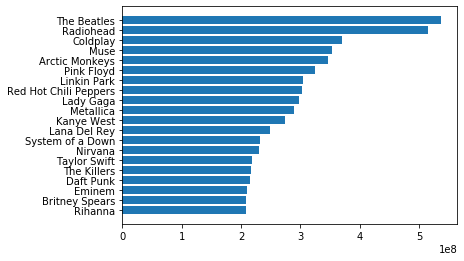

In [274]:
newA.plotIt(whatToPlot = newA.showMeTheTopArtists(20), byWhat = 'Scrobbles')

The Beatles are the winners in the category of most scrobbled artist with over the half of a billion scrobbled tracks, followed by Radiohead and Coldplay. Interesting result is that The Beatles have approximately 3.75 million listeneres whereas Coldplay on the third place have almost 5.5 million listeners. We will see that they are the winners in the second category where the ranking follows from the number of listeners.

We follow by top 20 artists sorted by number of listeners (i.e. the number of users of Last.fm, who had at least once listened to a song from this artist).

In [275]:
newA.showMeTheTopArtists(N = 20, sortBy = 'Listeners')

,Artist,Listeners,Scrobbles,Scrobbles per Listener
242,Coldplay,5487151,370302801,67.485440
844,Radiohead,4821534,515452255,106.906278
854,Red Hot Chili Peppers,4704723,302251011,64.244167
861,Rihanna,4675544,208837032,44.665825
337,Eminem,4624847,209443855,45.286656
543,Kanye West,4524008,273346082,60.421220
1018,The Killers,4510073,216418725,47.985637
760,Nirvana,4362266,229721764,52.661109
723,Muse,4153641,353109565,85.012057
836,Queen,4139663,203080438,49.057239


<BarContainer object of 20 artists>

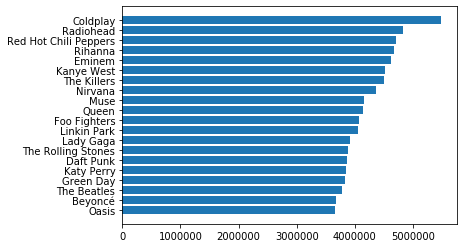

In [276]:
newA.plotIt(whatToPlot = newA.showMeTheTopArtists(20, sortBy = 'Listeners'), byWhat = 'Listeners')

Coldplay, Radiohead and Red Hot Chili Peppers are on the first three positions, but The Beatles dropped to 18th position. As we can see they have much higher Scrobble per (average) Listener ratio than the rest of the Top 20 (only them and Radiohead reached over the 100 Scrobbles per Listener).

Motivated by these differences we started looking for the bands with the most "devoted" fans, i.e. we plot the Top 20 artists with highest scrobbles per listener ratio.

In [277]:
newA.showMeTheTopArtists(N = 20, sortBy = 'SpL')

,Artist,Listeners,Scrobbles,Scrobbles per Listener
95,BTS,313537,203482762,648.991226
356,Exo,156865,36331408,231.609397
972,Taco Hemingway,48650,8111212,166.725838
1166,サカナクション,50651,8063977,159.206669
1176,星野源,14820,2254793,152.145277
992,The Beatles,3783733,537207098,141.978067
94,BROCKHAMPTON,327799,45529147,138.893490
811,Perfume,184314,25256200,137.028115
450,Horkýže Slíže,30794,3965752,128.783269
1183,相対性理論,43445,5531864,127.330280


<BarContainer object of 20 artists>

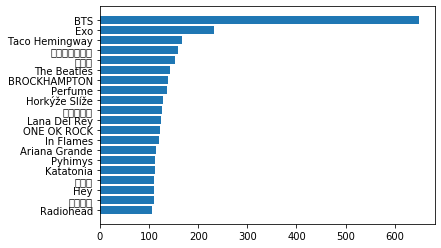

In [278]:
newA.plotIt(whatToPlot = newA.showMeTheTopArtists(20, sortBy = 'SpL'), byWhat = 'SpL')

From the first two charts only Beatles, Radiohead and Lana Del Rey stayed in a Top 20 Scrobbles per Listener artist. The band BTS on the first position has extremely large value indicating that great portion of the listeners of BTS listens to this band quite a lot.

It is worth mentioning that these statistics don't fully describe the mentioned property of "devoted" fans, since the unit measured (scrobbles) is highly influenced by length of songs of the interpret. The outlier in the last statistic (band BTS) has in average much shorter songs than e.g. Pink Floyd which are (at the time of writing this note) on the 22nd position. Since one scrobble of a song is typically assigned if a listener has listened through at least half of the song or at least 4 minutes of the track, if one song is approximately 3 or 4 minutes long, it suffices to get a scrobble after listening through approximately minute and a half or 2 minutes, whereas if the lenght of songs is on average longer (as is for Pink Floyd or most of the post-rock, classical etc. interprets), one scrobble is counted after longer period of time. Shorter/longer songs also plays a role in a number of songs on the album, and hence the number of songs overall.

__Interesting notes__: 
* The Slovakian band Horkýže Slíže is on the 9th position in the overall list.
* Four of the Top 5 bands originate in Southeast Asia.

## Which interpret is in Top 100 in only one (chosen) country?

In [157]:
df2 = pd.read_csv('geo_top_artists_101.csv', sep = ',')
df2.head()
geoArt = Analyzer()
geoArt.dataLoader(df2, 'GeoTopArtists')

Analyzer initialized.
Data loaded.


We use the method _showMeCountrySpecifics_ to see the country specific artists, i.e. these which appear only in top chart for a given country.

In [158]:
geoArt.showMeCountrySpecifics('Czechia')

Jaromír Nohavica
Lucie


In [159]:
geoArt.showMeCountrySpecifics('Slovakia')

Horkýže Slíže
Richard Müller


In [160]:
geoArt.showMeCountrySpecifics('Viet Nam')

Mỹ Tâm
Christina Perri
Westlife


# Which song is in Top 100 in only one (chosen) country?

In [163]:
df3 = pd.read_csv('geo_top_tracks_101.csv', sep = ',')
df3 = df3.drop(columns = ['Unnamed: 0'], axis = 1)
df3['ArtistTrack'] = df3['Artist'] + ' - '+ df3['Track']
geoTrack = Analyzer()
geoTrack.dataLoader(df3, 'GeoTopTracks')
df3.head()

Analyzer initialized.
Data loaded.


,CountryId,Country,Rank,Track,Duration,Artist,ArtistId,ArtistTrack
0,1,Taiwan,1.0,Hello,0.0,Adele,cc2c9c3c-b7bc-4b8b-84d8-4fbd8779e493,Adele - Hello
1,1,Taiwan,2.0,Photograph,258.0,Ed Sheeran,b8a7c51f-362c-4dcb-a259-bc6e0095f0a6,Ed Sheeran - Photograph
2,1,Taiwan,3.0,Thinking Out Loud,280.0,Ed Sheeran,b8a7c51f-362c-4dcb-a259-bc6e0095f0a6,Ed Sheeran - Thinking Out Loud
3,1,Taiwan,4.0,Shape of You,0.0,Ed Sheeran,b8a7c51f-362c-4dcb-a259-bc6e0095f0a6,Ed Sheeran - Shape of You
4,1,Taiwan,5.0,The Scientist,309.0,Coldplay,cc197bad-dc9c-440d-a5b5-d52ba2e14234,Coldplay - The Scientist


In [170]:
geoTrack.showMeCountrySpecifics('Czechia', typ = 'ArtistTrack')

In [171]:
geoTrack.showMeCountrySpecifics('Slovakia', typ = 'ArtistTrack')

Unfortunately no specific song is either for Czech Republic or for Slovakia.

In [173]:
geoTrack.showMeCountrySpecifics('Viet Nam', typ = 'ArtistTrack')

OneRepublic - Apologize
Backstreet Boys - Shape of My Heart


In [184]:
geoTrack.showMeCountrySpecifics('Iraq', typ = 'ArtistTrack')

Europe - The Final Countdown
Deep Purple - Smoke on the Water
ABBA - Gimme! Gimme! Gimme! (A Man After Midnight)


---